<a href="https://colab.research.google.com/github/lakshaygola/IMDB-EDA/blob/main/IMBD_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB MOVIE EDA

In the notebook we are doing Exploratory data analysis (EDA) on the IMDB Movies dataset.

For the analysis purpose we are using the:- 

1. Seaborn
2. Matplotlib
3. Plotly
4. Numpy 
5. Pandas

I take this dataset from the kaggel and the link of the dataset is given below

https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

We will try to analysis the dataset 

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('imbd-eda')
jovian.set_colab_id('14lmQgow33CqZ1rkVKjhdKW_BdSBDHaKo')

     |████████████████████████████████| 71kB 3.6MB/s 


In [2]:
# Intalling jovain and opendatasets library
!pip install jovian --upgrade --quiet
!pip install opendatasets

In [43]:
# Lets import some the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly as pl
import opendatasets as od
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Downloading the dataset 

To download the dataset we are using opendataset module which help us to direclty download the dataset from the internet


In [4]:
# Dataset link which we want to download
dataset_link = 'https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows'

od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lakshaygola
Your Kaggle Key: ··········


100%|██████████| 175k/175k [00:00<00:00, 47.2MB/s]

In [5]:
# Reading the dataset
imdb_data = pd.read_csv('/content/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

## As we download the dataset now its time to understand the data.

In [6]:
# Checking the first couple of rows of the dataset
imdb_data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [7]:
# To gather the info of the dataset
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
# Decribing the dataset
imdb_data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [9]:
# Shape of the dataset
imdb_data.shape

(1000, 16)

## Data Cleaning

As you can see in the shape of the dataset we have 1000 rows and 16 columns. 

With that we also have some missing values in some of the columns. And we have to. deal with it


In [10]:
# Lets find out which colums have missing data and how much
imdb_data.isnull().count()

Poster_Link      1000
Series_Title     1000
Released_Year    1000
Certificate      1000
Runtime          1000
Genre            1000
IMDB_Rating      1000
Overview         1000
Meta_score       1000
Director         1000
Star1            1000
Star2            1000
Star3            1000
Star4            1000
No_of_Votes      1000
Gross            1000
dtype: int64

So this is the Good News that our dataset dont have missing values but it can have NaN values

In [11]:
# Check for any NaN values in the dataset
imdb_data.isnull().values.sum()

427

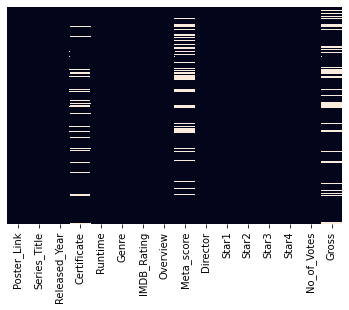

In [12]:
# Let's visualize the nan values with the help of the graph
sns.heatmap(imdb_data.isnull(), yticklabels= False, cbar= False)

We have 427 NaN values in the dataset as you can see in the output of imdb_data.info() as well as in the graph NaN values present in 3 columns 
1. Certification
2. Meta_Score
3. Gross

You can easily visualize that in the graph.

In [13]:
# Lets check out most common use certification in the dataset
print(imdb_data['Certificate'].mode())

0    U
dtype: object


In [14]:
# Let's fill all the missing values in certification columns of the dataset
imdb_data['Certificate'] = imdb_data['Certificate'].fillna(imdb_data['Certificate'].mode()[0])

In [15]:
# Now converting the data type of gross columns into int 
imdb_data['Gross'].head(0)

# Remove the commas for the digit
imdb_data['Gross']= imdb_data['Gross'].str.replace(',', '')
imdb_data['Gross'] = imdb_data['Gross'].astype('float64')

In [16]:
# Filling up the NaN Values in gross with 0 value
imdb_data['Gross'] = imdb_data['Gross'].fillna(0)
# Method2 -> imdb_data['Gross] = imdb_data['Gross].replace(np.nan, 0)

# Now converting the Gross variable to integer from float
imdb_data['Gross'] = imdb_data['Gross'].astype('int')

In [17]:
imdb_data.isnull().values.sum()

157

In [18]:
print('Mean of the Meta score variable : ', imdb_data['Meta_score'].mean())
print('Mode of the meta score variable : ', imdb_data['Meta_score'].mode()[0])

# As you can see there is no that much difference between mode and the mean 
#value of the meta score we can fill the columns either mode or mean
imdb_data['Meta_score'] = imdb_data['Meta_score'].fillna(imdb_data['Meta_score'].mode()[0])

Mean of the Meta score variable :  77.97153024911032
Mode of the meta score variable :  76.0


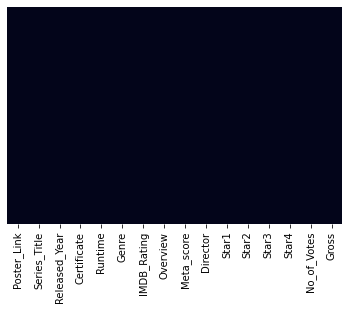

In [19]:
sns.heatmap(imdb_data.isnull(), cbar= False, yticklabels= False)

# DATA ANALYSIS

As we are done with the cleaning It time to Explore the data

### Q1. Analysis of the gross of a movie vs directors.

This analysis tell us that how director can effect the gross of the movie


In [20]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [21]:
# Listing all the numerical columns of the dataset
numericalCol = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

In [22]:
# Sorting the values of gross is decsending order
gross_data= imdb_data.sort_values(['Gross'], ascending = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



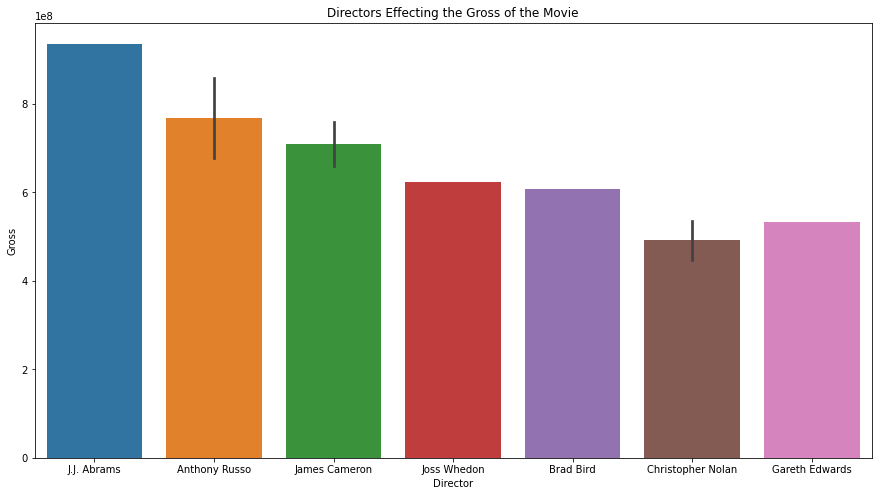

In [23]:
fig, ax = plt.subplots(figsize= (15,8))
g= sns.barplot(gross_data['Director'][:10], gross_data['Gross'][:10])
g.set_title('Directors Effecting the Gross of the Movie')
plt.show()

# Top Voted Movies

In [24]:
# To find the top voted movies in imdb dataset of movies
topVoted = imdb_data.sort_values(['No_of_Votes'], ascending= False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



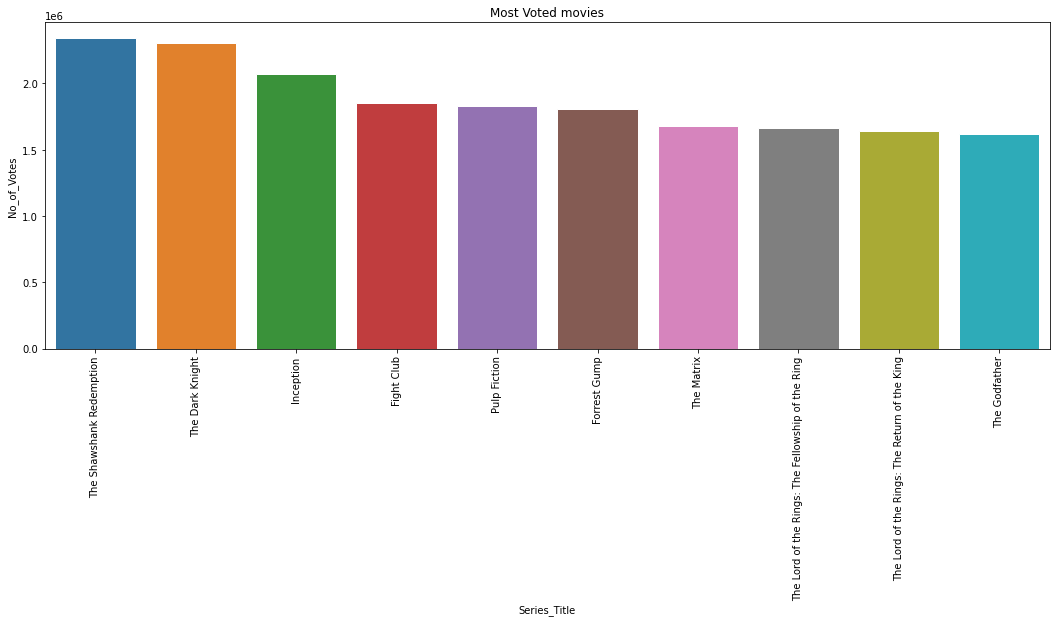

In [25]:
# Ploting the figure
fig, axes = plt.subplots(figsize = (18, 6))
sns.set_style('darkgrid')
g = sns.barplot(topVoted['Series_Title'][:10], topVoted['No_of_Votes'][:10])
g.set_title('Most Voted movies')
plt.xticks(rotation= 90)
plt.show()

# Meta score of top movies

Let's see how your meta score behave with respect to number of votes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



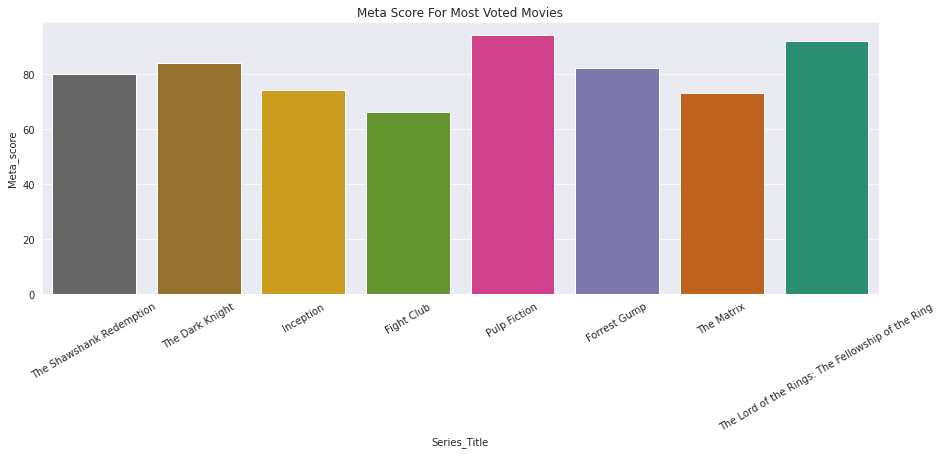

In [26]:
# Meta score of the top movies
fig, ax = plt.subplots(figsize= (15, 5))
sns.set_style('whitegrid')
g = sns.barplot(topVoted['Series_Title'][:8], topVoted['Meta_score'][:8], palette= 'Dark2_r')
g.set_title('Meta Score For Most Voted Movies')
plt.xticks(rotation = 30)
plt.show()

## Gross to Top voted movies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



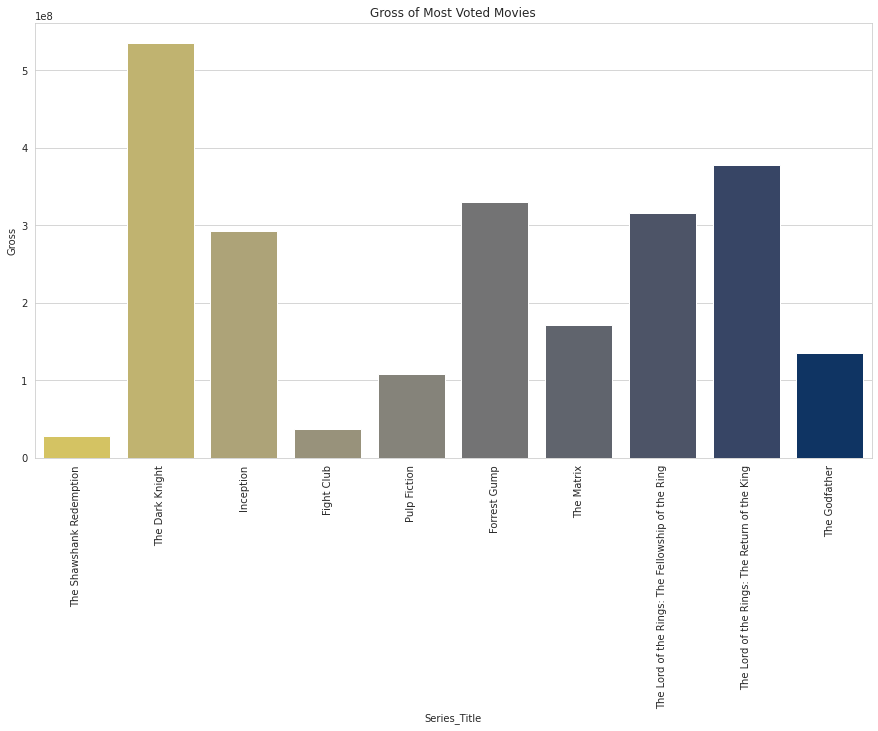

In [27]:
# Let's see the gross of top voted movies
fig, ax= plt.subplots(figsize = (15, 8))
g = sns.barplot(topVoted['Series_Title'][:10], topVoted['Gross'][:10], palette= 'cividis_r')
g.set_title('Gross of Most Voted Movies')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



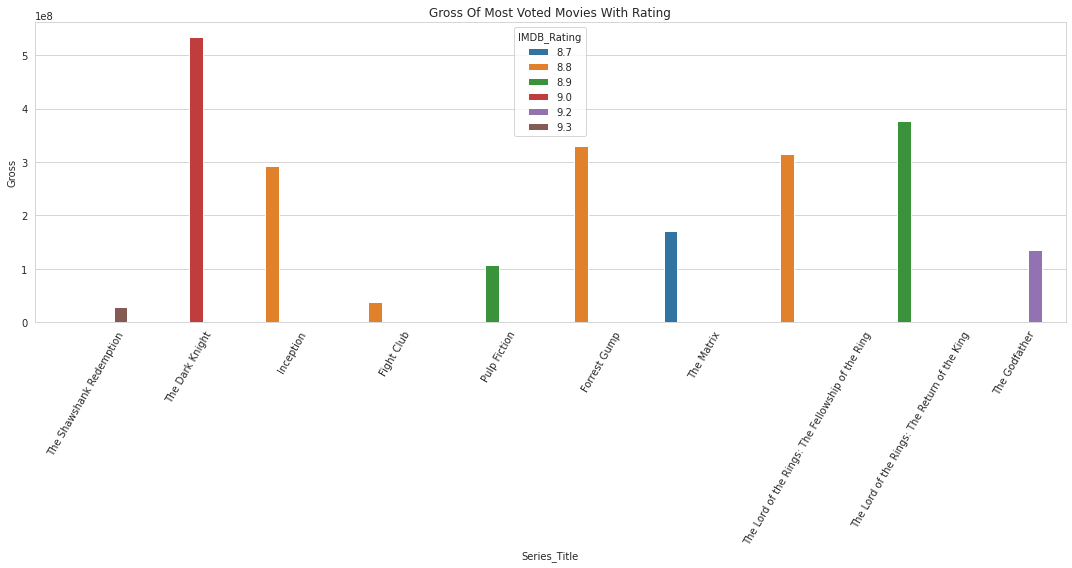

In [28]:
# Gross of top voted movies with their IMDB_Rating
fig, ax = plt.subplots(figsize = (15,8))
g= sns.barplot(topVoted['Series_Title'][:10], topVoted['Gross'][:10], hue = topVoted['IMDB_Rating'][:10])
g.set_title('Gross Of Most Voted Movies With Rating')
plt.xticks(rotation= 60)
plt.tight_layout()
plt.show()

### Let's see the graph for each numerical variable in the dataset how they correlate.


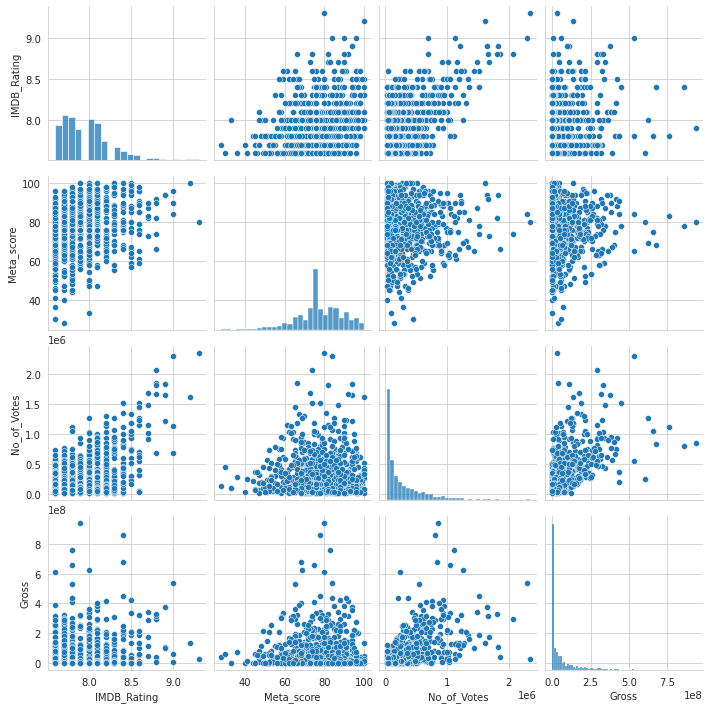

In [29]:
# Using pairplot from seaborn
sns.pairplot(imdb_data)

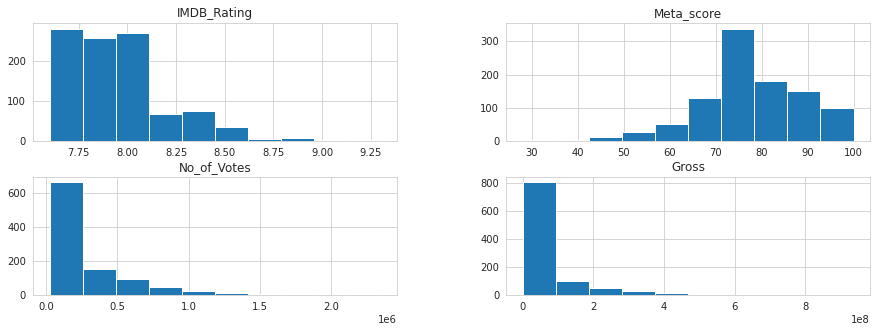

In [30]:
# To find the correlation using matplotlib
imdb_data[numericalCol].hist(figsize= (15,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



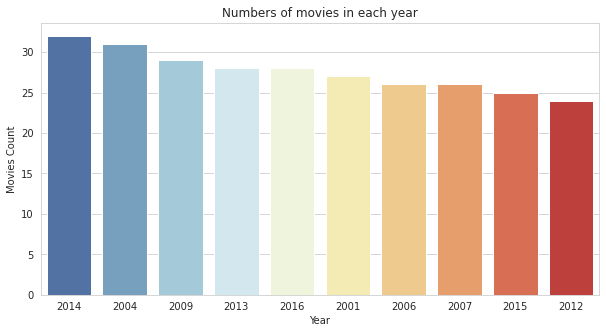

In [31]:
# Let's see how many movies are directed in a particular year
fig,ax =plt.subplots(figsize = (10 ,5))
g = sns.barplot(imdb_data['Released_Year'].value_counts().index[:10], imdb_data['Released_Year'].value_counts()[:10], palette= 'RdYlBu_r')
g.set_title('Numbers of movies in each year')
g.set_xlabel('Year')
g.set_ylabel('Movies Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



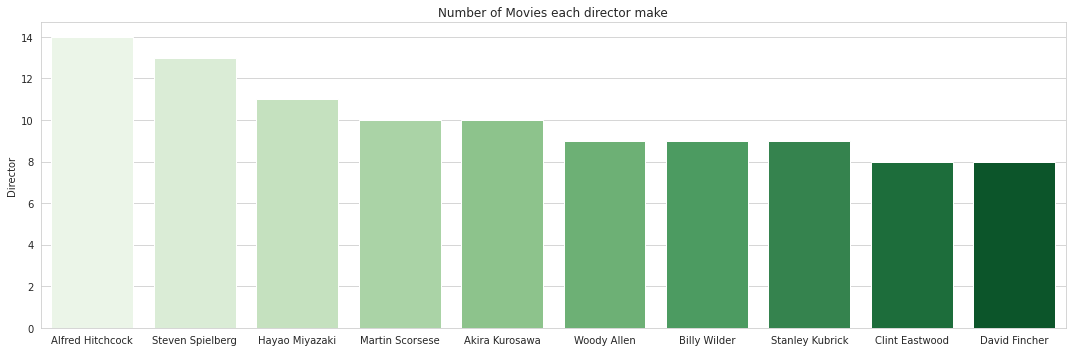

In [32]:
# Number of Movies each director make
fig, ax = plt.subplots(figsize= (15,5))
g = sns.barplot(imdb_data['Director'].value_counts()[:10].index, imdb_data['Director'].value_counts()[:10], palette = 'Greens')
g.set_title('Number of Movies each director make')
plt.tight_layout()
plt.show()

## Appearance Of Different Star Cast On the Top Rated Movies

In [33]:
# Group the data on the basis of star
imdb_data.groupby('Star1').sum().reset_index()

,Star1,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,Aamir Khan,57.5,531.0,997061,32108251
1,Aaron Taylor-Johnson,7.6,66.0,524081,48071303
2,Abhay Deol,8.0,76.0,28749,10950
3,Abraham Attah,7.7,79.0,73964,83861
4,Adam Driver,7.9,94.0,246644,2000000
...,...,...,...,...,...
655,Zbigniew Zamachowski,7.6,88.0,64390,1464625
656,Zooey Deschanel,7.7,76.0,472242,32391374
657,Çetin Tekindor,8.3,76.0,78925,0
658,Éric Toledano,8.5,57.0,760360,13182281


## Appearances of the star in the top rated movies

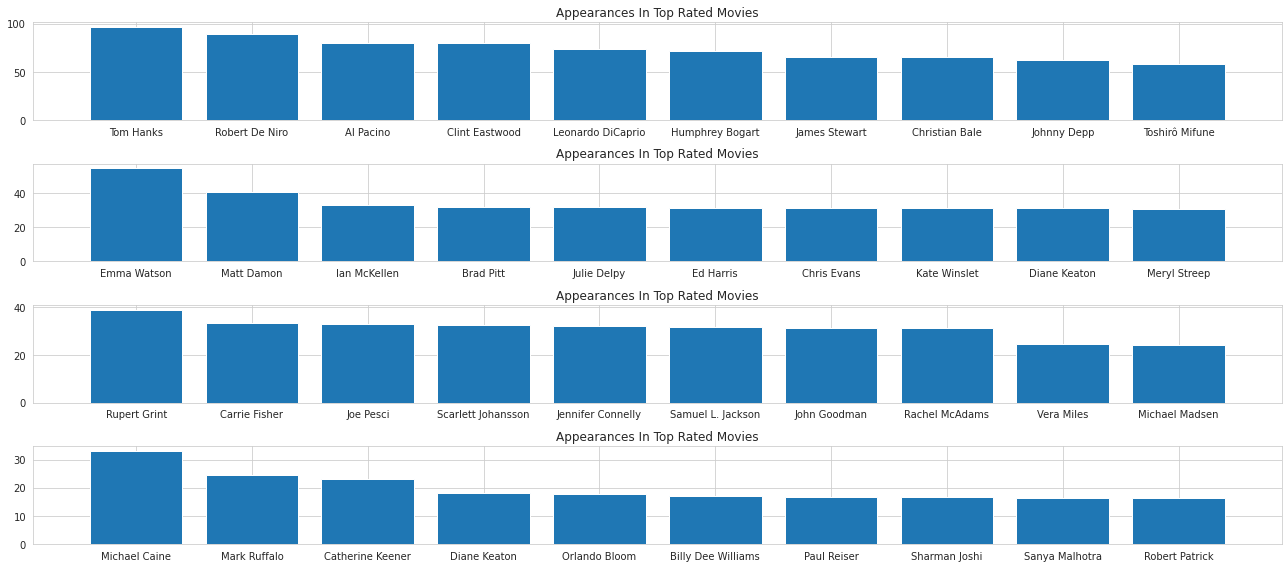

In [34]:
# Let's see the appearances of the star in the movies
stars = ['Star1', 'Star2', 'Star3', 'Star4']
fig, axs = plt.subplots(4 ,1 , figsize = (18, 8))
ax = 0
for x in stars:
  data = imdb_data.groupby(x).sum().reset_index()
  topStarRating = data.sort_values(['IMDB_Rating'], ascending = False)[:10]
  axs[ax].bar(topStarRating[x], topStarRating['IMDB_Rating'])
  axs[ax].set_title('Appearances In Top Rated Movies')
  ax += 1
  plt.tight_layout()

## Effect of the star in the gross of the movie


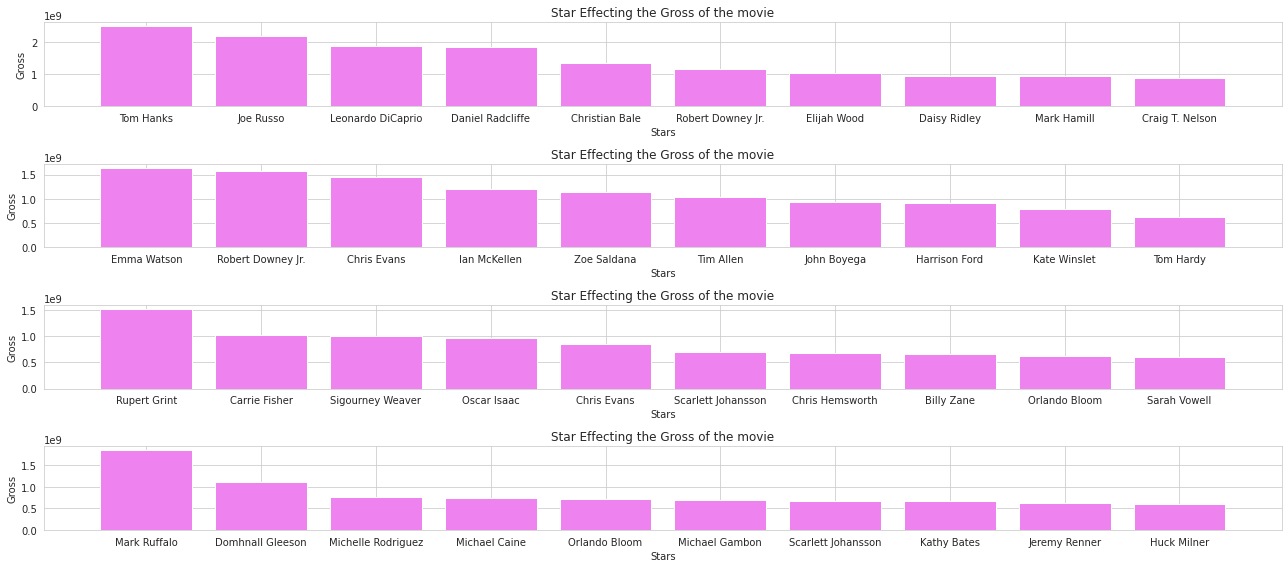

In [35]:
# Star effecting the gross of the movie
stars = ["Star1", 'Star2', 'Star3', 'Star4']
fig, axs = plt.subplots(4, 1, figsize= (18,8))
ax = 0
for x in stars:
  data = imdb_data.groupby(x).sum().reset_index()
  topGross = data.sort_values(['Gross'], ascending = False)[:10]
  axs[ax].bar(topGross[x], topGross['Gross'], color = 'violet')
  axs[ax].set_title('Star Effecting the Gross of the movie')
  axs[ax].set_ylabel('Gross')
  axs[ax].set_xlabel('Stars')
  ax += 1
  plt.tight_layout()

## Top 10 Genres

In [36]:
# Taking the 10 most common genres of the given movies
genres = []
for x in imdb_data['Genre']:
  for y in x.split(','):
    genres.append(y.strip().lower())

genresCount = Counter(genres)
genresCount = genresCount.most_common()[:10]
x, y = map(list,zip(*genresCount))
print(genresCount)

[('drama', 724), ('comedy', 233), ('crime', 209), ('adventure', 196), ('action', 189), ('thriller', 137), ('romance', 125), ('biography', 109), ('mystery', 99), ('animation', 82)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



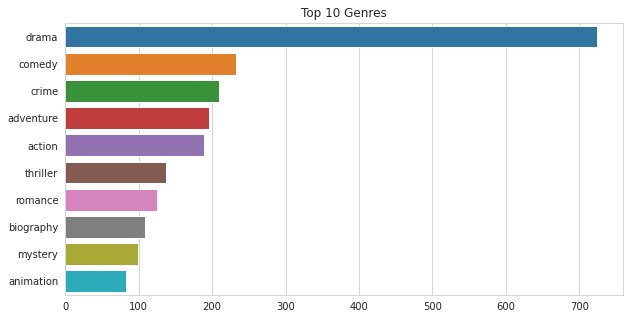

In [37]:
# Now plotting these Genres as a bar plot
fig , ax = plt.subplots(figsize= (10,5))
g = sns.barplot(y, x)
g.set_title('Top 10 Genres')
plt.show()

In [ ]:
# Creating list which contain name of all the stars
allStars = imdb_data['Star1'].tolist()
allStars.append(imdb_data['Star2'].tolist())
allStars.append(imdb_data['Star3'].tolist())

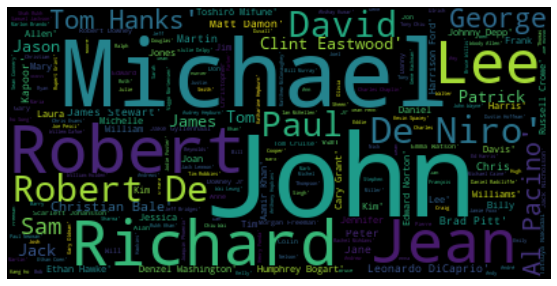

In [51]:
# Now Creating the wordcloud using that list
fig ,ax = plt.subplots(figsize= (15,5))
wcStar = WordCloud(background_color='black',
                   max_words = 200)
wcStar.generate(str(allStars))
plt.imshow(wcStar, interpolation= 'bilinear')
plt.axis('off')
plt.show()

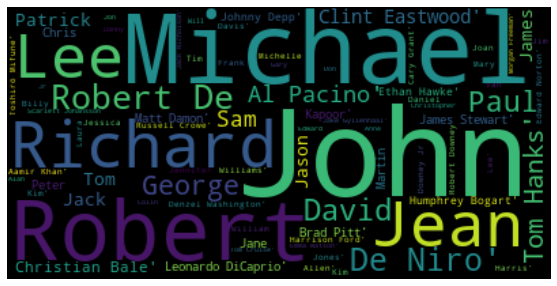

In [53]:
# To remove the stopword from the review
Stopwords = set(STOPWORDS)

# Examin the overview also
fig ,ax = plt.subplots(figsize= (15,5))
wcOverview = WordCloud(background_color='black',
                      max_words = 200, 
                      stopwords = Stopwords)
wcOverview.generate(str(allStars))
plt.imshow(wcOverview, interpolation= 'bilinear')
plt.axis('off')
plt.show()

We can clearly observe the overviews wordcloud and the star wordcloud show much similar.

This mention that movies which have great star cast have larger number of reviews that means that movies with great stars work well in the cinemas as they have lots of reviews on that.

In [54]:
jovian.commit(project= 'IMDB-EDA')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/lakshaygola/imdb-eda


'https://jovian.ai/lakshaygola/imdb-eda'